In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('gamma.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [13]:
print(df.shape)

(19020, 11)


In [14]:
df[10].value_counts()

g    12332
h     6688
Name: 10, dtype: int64

In [15]:
data_x = df.iloc[:, :-1]
data_y = df.iloc[:, -1]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Random Train/Test Split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y,
                                                    test_size=0.30, 
                                                    shuffle=True,
                                                    random_state=42)

# Normalization of features
min_max_scaler = MinMaxScaler()
train_x = min_max_scaler.fit_transform(train_x)
test_x = min_max_scaler.transform(test_x)

# Create DataFrame from Numpy array
train_x = pd.DataFrame(train_x)
test_x = pd.DataFrame(test_x)

# Prevents issues with CV
train_x.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [17]:
print(train_y.value_counts())
print(test_y.value_counts())

g    8627
h    4687
Name: 10, dtype: int64
g    3705
h    2001
Name: 10, dtype: int64


In [18]:
# ONLY FOR WORKING WITH WHOLE DATASET
# Normalization of features
min_max_scaler = MinMaxScaler()
data_x = min_max_scaler.fit_transform(data_x)

# Create DataFrame from Numpy array
data_x = pd.DataFrame(data_x)

# Prevents issues with CV
data_x.reset_index(drop=True, inplace=True)

# Convert str labels to int
data_y = np.array([0 if element == 'g' else 1 for element in data_y])

In [19]:
count_g = 0
count_h = 0

for element in data_y:
    if element == 1:
        count_h += 1
    else:
        count_g += 1
        
print(count_g)
print(count_h)

12332
6688


### Cross Validation
- Notes on the dataset:
    - g = gamma (signal): 12332       = 0 (negative class)
    - h = hadron (background): 6688   = 1 (positive class)

In [48]:
from helper import kmeans_and_silhouette, kmeans_variable_clusters, gmm_variable_clusters,\
cluster_accuracy
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection

dataset = 'GAMMA'

### k-Means Clustering

Number of clusters from 1 to 10 are being tested
For n_clusters = 2 The average silhouette_score is : 0.31817684372355187
For n_clusters = 3 The average silhouette_score is : 0.29221298662887285
For n_clusters = 4 The average silhouette_score is : 0.29696713443053907
For n_clusters = 5 The average silhouette_score is : 0.25847887321511753
For n_clusters = 6 The average silhouette_score is : 0.24635440239312076
For n_clusters = 7 The average silhouette_score is : 0.24095194111596213
For n_clusters = 8 The average silhouette_score is : 0.21003042306001318
For n_clusters = 9 The average silhouette_score is : 0.21141436861169208
For n_clusters = 10 The average silhouette_score is : 0.21150996511552286


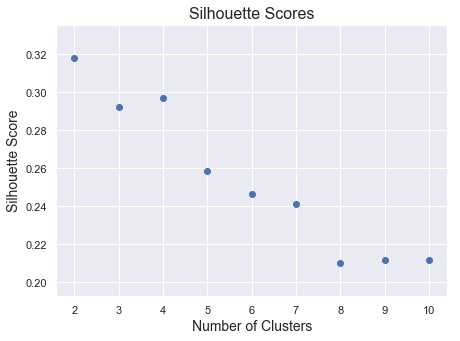

In [14]:
scores, n_clusters = kmeans_and_silhouette(10, data_x)

method = 'kmeans'
title = 'Silhouette Scores'

plt.figure(figsize=(7,5))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=16)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + ".png")

plt.show()

In [15]:
# BUILD MODEL with chosen hyperparamter and calculate accuracy for entire dataset
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_x)
pred = kmeans.predict(data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

Clustering accuracy: 0.6483701366982124


### Expectation Maximization

Number of clusters from 1 to 10 are being tested


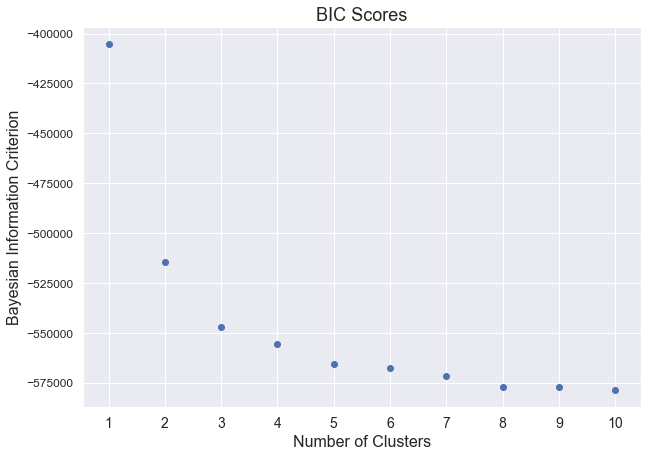

In [16]:
scores, n_clusters = gmm_variable_clusters(10, data_x, 'full')

method = 'gmm'
title = 'BIC Scores'

plt.figure(figsize=(10,7))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=18)
plt.xticks(n_clusters, fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel("Bayesian Information Criterion", fontsize=16)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + ".png")

plt.show()

In [17]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data_x)
pred = gmm.predict(data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

Clustering accuracy: 0.7731335436382755


### PCA

In [58]:
n_components = 3

pca = PCA(n_components=n_components, random_state=42)

# Fit on input training data and transform it
pca_data_x = pca.fit_transform(data_x)

print(pca.explained_variance_ratio_)
print("Amount explained by", n_components, "components:", sum(pca.explained_variance_ratio_))

[0.48565667 0.30771405 0.08802445]
Amount explained by 3 components: 0.8813951745147078


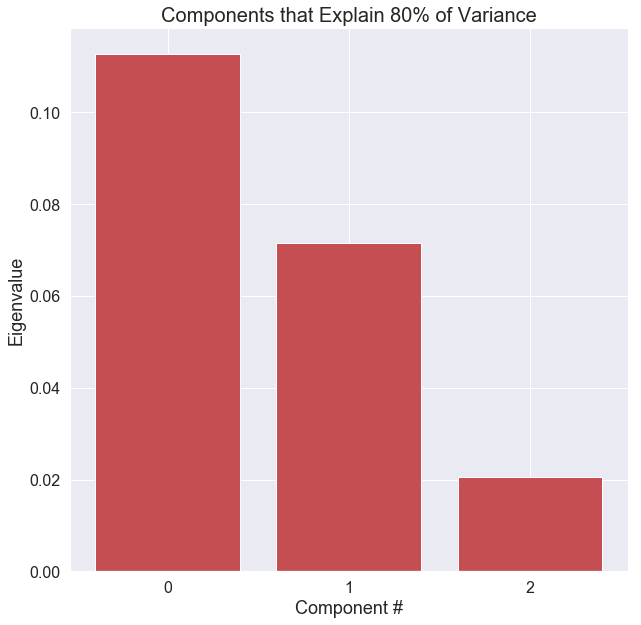

In [63]:
# DISTRIBUTION OF EIGENVALUES
eigenvalues = pca.explained_variance_

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))

plt.bar(range(len(eigenvalues)), eigenvalues,
       color="r", align="center")

plt.xticks([0,1,2], fontsize=16)
plt.yticks(fontsize=16)
plt.title("Components that Explain 80% of Variance", fontsize=20)
plt.xlabel("Component #", fontsize=18)
plt.ylabel("Eigenvalue", fontsize=18)

# Saving plots
plt.savefig("plots/" + dataset + '_pca.png')

plt.show()

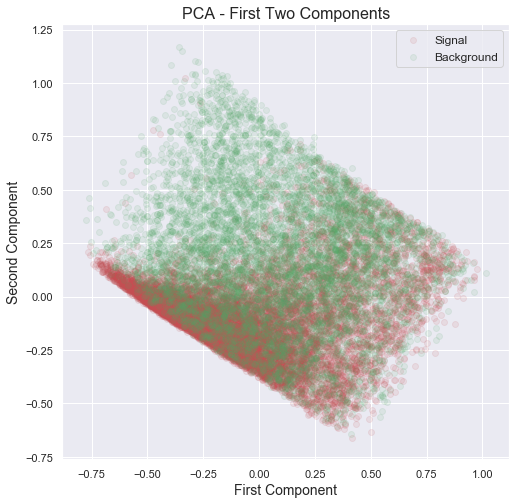

In [33]:
# Plot first two components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Component', fontsize = 14)
ax.set_ylabel('Second Component', fontsize = 14)
ax.set_title('PCA - First Two Components', fontsize = 16)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    target_indices = data_y == target
    ax.scatter(pca_data_x[target_indices, 0]
               , pca_data_x[target_indices, 1]
               , c = color
               , alpha = 0.1)
ax.legend(['Signal', 'Background'], fontsize=12)

# Saving plots
plt.savefig("plots/" + dataset + '_' + 'pca_components.png')

plt.show()

Number of clusters from 1 to 10 are being tested
For n_clusters = 2 The average silhouette_score is : 0.3578155038307752
For n_clusters = 3 The average silhouette_score is : 0.3409975947433121
For n_clusters = 4 The average silhouette_score is : 0.3478903931949185
For n_clusters = 5 The average silhouette_score is : 0.31157023982493987
For n_clusters = 6 The average silhouette_score is : 0.30319154355680833
For n_clusters = 7 The average silhouette_score is : 0.3021592139474868
For n_clusters = 8 The average silhouette_score is : 0.27458948700506197
For n_clusters = 9 The average silhouette_score is : 0.2773337313757527
For n_clusters = 10 The average silhouette_score is : 0.2794387629044796


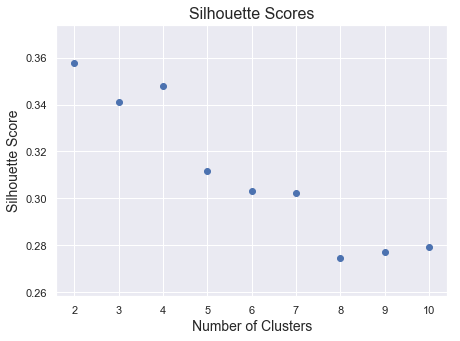

In [35]:
scores, n_clusters = kmeans_and_silhouette(10, pca_data_x)

analysis = 'pca'
method = 'kmeans'
title = 'Silhouette Scores'

plt.figure(figsize=(7,5))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=16)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

Number of clusters from 1 to 10 are being tested


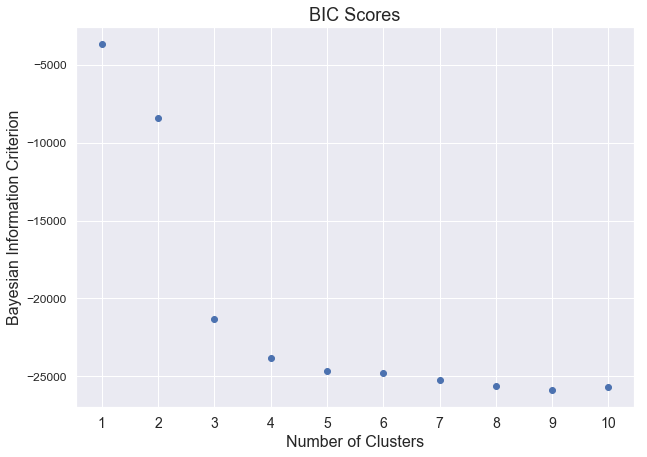

In [36]:
scores, n_clusters = gmm_variable_clusters(10, pca_data_x, 'full')

method = 'gmm'
title = 'BIC Scores'

plt.figure(figsize=(10,7))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=18)
plt.xticks(n_clusters, fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel("Bayesian Information Criterion", fontsize=16)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

In [38]:
# Get Accuracy Scores
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_data_x)
pred = kmeans.predict(pca_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(pca_data_x)
pred = gmm.predict(pca_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

Clustering accuracy: 0.6483701366982124
Clustering accuracy: 0.7705573080967403


### ICA

In [41]:
n_components = 10

ica = FastICA(n_components=n_components, random_state=42)

# Fit on input training data, transform it, convert to dataframe
ica_data_x = ica.fit_transform(data_x)
ica_data_x = pd.DataFrame(ica_data_x)

kurtosis = ica_data_x.kurtosis()

threshold = 20
columns = []
count = 0
# Find features with kurtosis greater than threshold
for i, component in enumerate(kurtosis):
    if component > threshold:
        columns.append(i)
        count += 1
print('Total Components:', count)

ica_data_x = ica_data_x.iloc[:, columns]

Total Components: 2


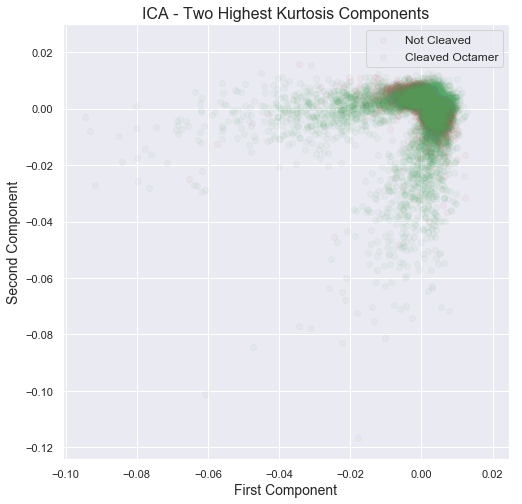

In [50]:
# Plot highest curtosis components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Component', fontsize = 14)
ax.set_ylabel('Second Component', fontsize = 14)
ax.set_title('ICA - Two Highest Kurtosis Components', fontsize = 16)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    target_indices = data_y == target
    ax.scatter(ica_data_x.loc[target_indices, 0]
               , ica_data_x.loc[target_indices, 5]
               , c = color
               , alpha = 0.05)
leg = ax.legend(['Not Cleaved', 'Cleaved Octamer'], fontsize=12)

# Saving plots
plt.savefig("plots/" + dataset + '_' + 'ica_components.png')

plt.show()

In [65]:
n_components = 10

ica = FastICA(n_components=n_components, random_state=42)

# Fit on input training data, transform it, convert to dataframe
ica_data_x = ica.fit_transform(data_x)
ica_data_x = pd.DataFrame(ica_data_x)

kurtosis = ica_data_x.kurtosis()

threshold = 10
columns = []
count = 0
# Find features with kurtosis greater than threshold
for i, component in enumerate(kurtosis):
    if component > threshold:
        columns.append(i)
        count += 1
print('Total Components:', count)

ica_data_x = ica_data_x.iloc[:, columns]

Total Components: 5


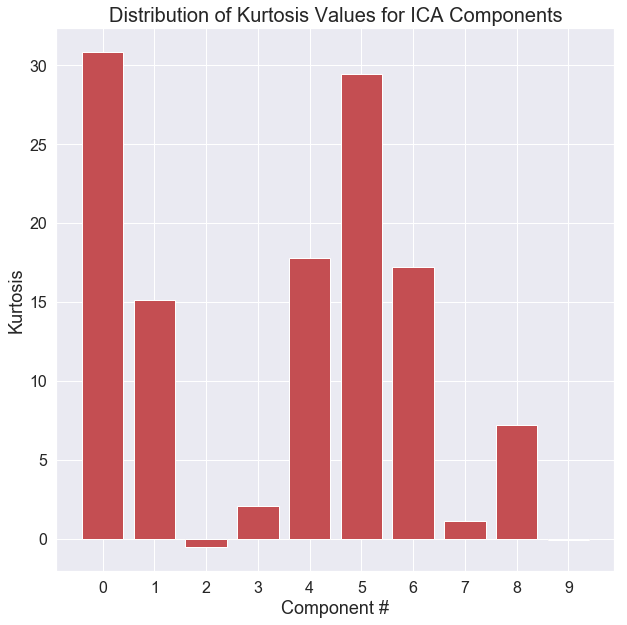

In [70]:
# DISTRIBUTION OF Kurtosis values

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))

plt.bar(range(len(kurtosis)), kurtosis,
       color="r", align="center")

plt.xticks([i for i in range(10)], fontsize=16)
plt.yticks(fontsize=16)
plt.title("Distribution of Kurtosis Values for ICA Components", fontsize=20)
plt.xlabel("Component #", fontsize=18)
plt.ylabel("Kurtosis", fontsize=18)

# Saving plots
plt.savefig("plots/" + dataset + '_ica.png')

plt.show()

Number of clusters from 1 to 10 are being tested
For n_clusters = 2 The average silhouette_score is : 0.611720429706434
For n_clusters = 3 The average silhouette_score is : 0.5708080457507387
For n_clusters = 4 The average silhouette_score is : 0.5410209738906513
For n_clusters = 5 The average silhouette_score is : 0.47832610941777814
For n_clusters = 6 The average silhouette_score is : 0.4405929112168113
For n_clusters = 7 The average silhouette_score is : 0.20418294611563045
For n_clusters = 8 The average silhouette_score is : 0.2033087571014253
For n_clusters = 9 The average silhouette_score is : 0.20728399766961988
For n_clusters = 10 The average silhouette_score is : 0.2041186834317503


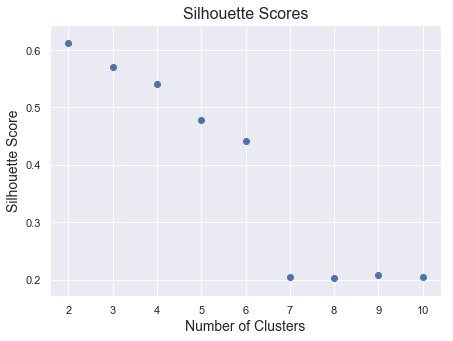

In [52]:
scores, n_clusters = kmeans_and_silhouette(10, ica_data_x)

analysis = 'ica'
method = 'kmeans'
title = 'Silhouette Scores'

plt.figure(figsize=(7,5))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=16)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

Number of clusters from 1 to 10 are being tested


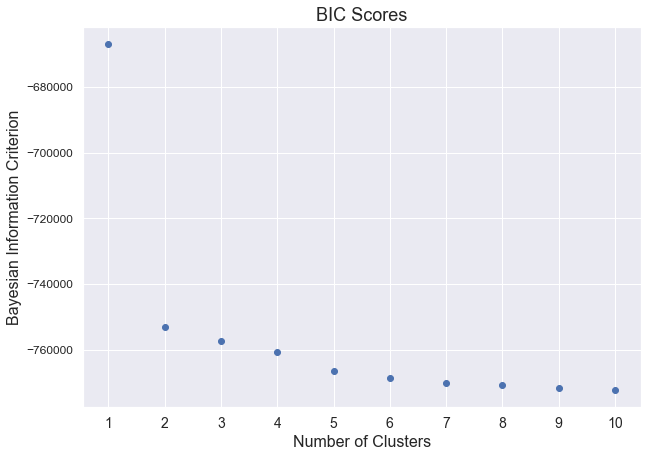

In [53]:
scores, n_clusters = gmm_variable_clusters(10, ica_data_x, 'full')

method = 'gmm'
title = 'BIC Scores'

plt.figure(figsize=(10,7))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=18)
plt.xticks(n_clusters, fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel("Bayesian Information Criterion", fontsize=16)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

In [55]:
# Get Accuracy Scores
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(ica_data_x)
pred = kmeans.predict(ica_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(ica_data_x)
pred = gmm.predict(ica_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

Clustering accuracy: 0.7055205047318612
Clustering accuracy: 0.729758149316509


### RCA

In [22]:
# Repeat experiment multiple times
repeat = 10
n_components = 5
kmeans_scores = []
gmm_scores = []

for i in range(repeat):
    grp = GaussianRandomProjection(n_components=n_components)

    # Fit on input training data and transform it
    grp_data_x = grp.fit_transform(data_x)
    
    scores1, n_clusters = kmeans_and_silhouette(10, grp_data_x)
    scores2, n_clusters = gmm_variable_clusters(10, grp_data_x, 'full')
    kmeans_scores.append(scores1)
    gmm_scores.append(scores2)

Number of clusters from 1 to 10 are being tested
For n_clusters = 2 The average silhouette_score is : 0.34604603601504624
For n_clusters = 3 The average silhouette_score is : 0.3674608842665106
For n_clusters = 4 The average silhouette_score is : 0.2942595613464005
For n_clusters = 5 The average silhouette_score is : 0.2913704822814083
For n_clusters = 6 The average silhouette_score is : 0.2502940723350975
For n_clusters = 7 The average silhouette_score is : 0.24595417622551205
For n_clusters = 8 The average silhouette_score is : 0.2519751183337225
For n_clusters = 9 The average silhouette_score is : 0.24305378677174072
For n_clusters = 10 The average silhouette_score is : 0.22956364927563305
Number of clusters from 1 to 10 are being tested
Number of clusters from 1 to 10 are being tested
For n_clusters = 2 The average silhouette_score is : 0.3263024698882269
For n_clusters = 3 The average silhouette_score is : 0.2776917333741511
For n_clusters = 4 The average silhouette_score is : 0.2

In [32]:
# Create Dataframe and Collect data metrics
new_kmeans_scores = pd.DataFrame(kmeans_scores)
new_gmm_scores = pd.DataFrame(gmm_scores)
kmeans_mean = new_kmeans_scores.mean()
gmm_mean = new_gmm_scores.mean()
kmeans_SD = new_kmeans_scores.std(axis=0)
gmm_SD = new_gmm_scores.std(axis=0)

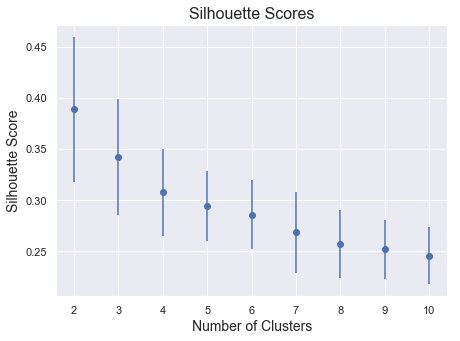

In [33]:
n_clusters = [i for i in range(2, 11)]
analysis = 'rca'
method = 'kmeans'
title = 'Silhouette Scores'

plt.figure(figsize=(7,5))
sns.set()
plt.errorbar(x=n_clusters, y=kmeans_mean, yerr=kmeans_SD, fmt='o')

plt.title(title, fontsize=16)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

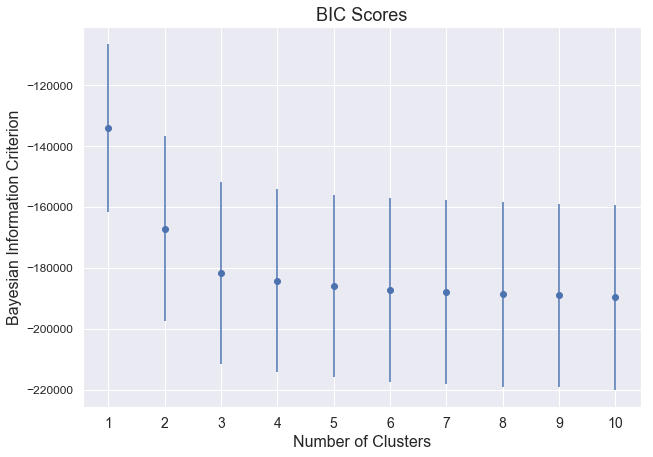

In [34]:
n_clusters = [i for i in range(1, 11)]
method = 'gmm'
title = 'BIC Scores'

plt.figure(figsize=(10,7))
sns.set()
plt.errorbar(x=n_clusters, y=gmm_mean, yerr=gmm_SD, fmt='o')

plt.title(title, fontsize=18)
plt.xticks(n_clusters, fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel("Bayesian Information Criterion", fontsize=16)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

In [31]:
grp = GaussianRandomProjection(n_components=5)

# Fit on input training data and transform it
grp_data_x = grp.fit_transform(data_x)

# Get Accuracy Scores
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(grp_data_x)
pred = kmeans.predict(grp_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(grp_data_x)
pred = gmm.predict(grp_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

Clustering accuracy: 0.6483701366982124
Clustering accuracy: 0.7703995793901157


### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy', random_state=42)

clf.fit(train_x, train_y)

clf.score(test_x, test_y)

0.8641780581843673

1.0


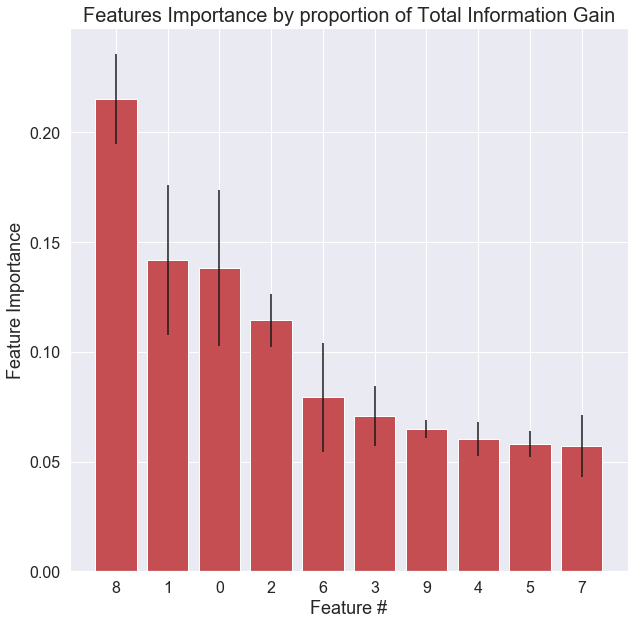

In [73]:
'''FEATURE IMPORTANCES'''
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)

num_important_features = 10
indices = np.argsort(importances)[::-1][:num_important_features]

# All importances up to 50%
print(np.sum(importances[indices][:num_important_features]))

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))

plt.bar(range(train_x.shape[1])[:num_important_features], importances[indices],
       color="r", yerr=std[indices], align="center")

plt.xticks(range(train_x.shape[1])[:num_important_features], indices, fontsize=16)
plt.yticks(fontsize=16)
plt.title("Features Importance by proportion of Total Information Gain", fontsize=20)
plt.xlabel("Feature #", fontsize=18)
plt.ylabel("Feature Importance", fontsize=18)

# Saving plots
plt.savefig("plots/" + dataset + '_rf.png')

plt.show()

# New Reduced Feature set
rf_data_x = data_x.iloc[:, indices]

Number of clusters from 1 to 10 are being tested
For n_clusters = 2 The average silhouette_score is : 0.5847249475580791
For n_clusters = 3 The average silhouette_score is : 0.4696558141372598
For n_clusters = 4 The average silhouette_score is : 0.4876026407103404
For n_clusters = 5 The average silhouette_score is : 0.4218448903107848
For n_clusters = 6 The average silhouette_score is : 0.40514235253290154
For n_clusters = 7 The average silhouette_score is : 0.4081393159422223
For n_clusters = 8 The average silhouette_score is : 0.3913187508168638
For n_clusters = 9 The average silhouette_score is : 0.3933279978976785
For n_clusters = 10 The average silhouette_score is : 0.39599941817994305


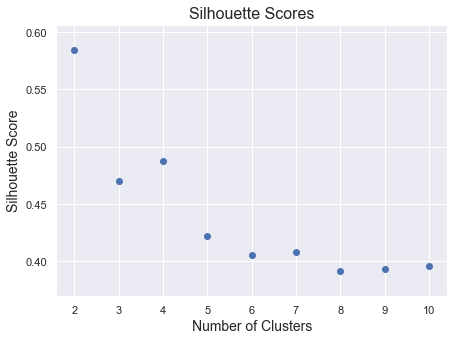

In [40]:
scores, n_clusters = kmeans_and_silhouette(10, rf_data_x)

analysis = 'rf'
method = 'kmeans'
title = 'Silhouette Scores'

plt.figure(figsize=(7,5))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=16)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

Number of clusters from 1 to 10 are being tested


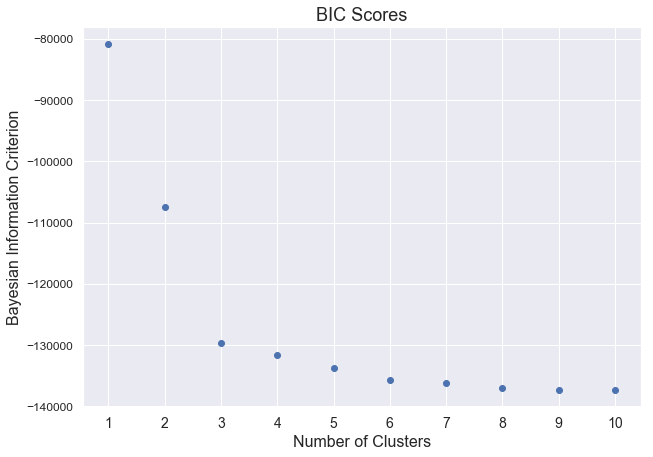

In [41]:
scores, n_clusters = gmm_variable_clusters(10, rf_data_x, 'full')

method = 'gmm'
title = 'BIC Scores'

plt.figure(figsize=(10,7))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=18)
plt.xticks(n_clusters, fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel("Bayesian Information Criterion", fontsize=16)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

In [42]:
# Get Accuracy Scores
kmeans = KMeans(n_clusters=29, random_state=42)
kmeans.fit(rf_data_x)
pred = kmeans.predict(rf_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

gmm = GaussianMixture(n_components=9, random_state=42)
gmm.fit(rf_data_x)
pred = gmm.predict(rf_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

Clustering accuracy: 0.7890115667718192
Clustering accuracy: 0.7983175604626709


## Neural Network Analysis

In [74]:
# Scorers
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import time

In [75]:
# Build Architecture
def build_nn(train_x, test_x):
    clf = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=60, 
                    learning_rate_init=0.025)

    start = time.time()
    print('2-fold CV Accuracy:', np.mean(cross_val_score(clf, train_x, train_y, cv=2)))
    end = time.time()
    time_elapsed = end - start
    print('Time elapsed for cross-validation:', time_elapsed)
    
    clf.fit(train_x, train_y)

    pred = clf.predict(test_x)

    print('Test Accuracy:', clf.score(test_x, test_y))

    print(confusion_matrix(test_y, pred))

In [76]:
# Create Dimensionality Reduction Datasets
# PCA
pca = PCA(n_components=3, random_state=42)
pca.fit(data_x)
pca_train_x = pca.transform(train_x)
pca_test_x = pca.transform(test_x)

# ICA
ica = FastICA(n_components=10, random_state=42)
ica_data_x = ica.fit_transform(data_x)
ica_train_x = ica.transform(train_x)
ica_test_x = ica.transform(test_x)
ica_data_x = pd.DataFrame(ica_data_x)
kurtosis = ica_data_x.kurtosis()

threshold = 10
columns = []
count = 0
# Find features with kurtosis greater than threshold
for i, component in enumerate(kurtosis):
    if component > threshold:
        columns.append(i)
        count += 1
print('Total Components:', count)
ica_train_x = ica_train_x[:, columns]
ica_test_x = ica_test_x[:, columns]

# RCA
grp = GaussianRandomProjection(n_components=5)
grp.fit_transform(data_x)
grp_train_x = pca.transform(train_x)
grp_test_x = pca.transform(test_x)

# RF (@indices from random forest section)
rf_train_x = train_x.iloc[:, indices]
rf_test_x = test_x.iloc[:, indices]

Total Components: 5


In [77]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Perform 2-fold CV and Test
print('--Full dataset--')
build_nn(train_x, test_x)
print('--PCA dataset--')
build_nn(pca_train_x, pca_test_x)
print('--ICA dataset--')
build_nn(ica_train_x, ica_test_x)
print('--RCA dataset--')
build_nn(grp_train_x, grp_test_x)
print('--RF dataset--')
build_nn(rf_train_x, rf_test_x)

--Full dataset--
2-fold CV Accuracy: 0.8571429893115858
Time elapsed for cross-validation: 0.858086109161377
Test Accuracy: 0.8533123028391167
[[3529  176]
 [ 661 1340]]
--PCA dataset--
2-fold CV Accuracy: 0.806594230552603
Time elapsed for cross-validation: 0.37345409393310547
Test Accuracy: 0.8080967402733964
[[3438  267]
 [ 828 1173]]
--ICA dataset--
2-fold CV Accuracy: 0.7647600008015227
Time elapsed for cross-validation: 0.8182168006896973
Test Accuracy: 0.7676130389064143
[[3568  137]
 [1189  812]]
--RCA dataset--
2-fold CV Accuracy: 0.8042654368948865
Time elapsed for cross-validation: 0.3826601505279541
Test Accuracy: 0.809323519102699
[[3349  356]
 [ 732 1269]]
--RF dataset--
2-fold CV Accuracy: 0.8413702762509532
Time elapsed for cross-validation: 0.6766579151153564
Test Accuracy: 0.8310550297932001
[[3113  592]
 [ 372 1629]]


In [79]:
# K-means Clustering Dataset
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_x)
pred = kmeans.predict(data_x)

new_data_x = data_x.copy()

# Create one-hot encodings of cluster labels
for label in set(pred):
    new_data_x[str(label)] = 0
    for i in range(len(new_data_x)):
        if pred[i] == label:
            new_data_x.loc[i, str(label)] = 1

# Train Test split
# Random Train Test Split
kmeans_train_x, kmeans_test_x, train_y, test_y = train_test_split(new_data_x, data_y,
                                                    test_size=0.30,
                                                    shuffle=True,
                                                    random_state=42)

# Normalization of features
min_max_scaler = MinMaxScaler()
kmeans_train_x = min_max_scaler.fit_transform(kmeans_train_x)
kmeans_test_x = min_max_scaler.transform(kmeans_test_x)

# Create DataFrame from Numpy array
kmeans_train_x = pd.DataFrame(kmeans_train_x)
kmeans_test_x = pd.DataFrame(kmeans_test_x)

# Prevents issues with CV
kmeans_train_x.reset_index(drop=True, inplace=True)
kmeans_test_x.reset_index(drop=True, inplace=True)

print('--Kmeans dataset--')
build_nn(kmeans_train_x, kmeans_test_x)

--Kmeans dataset--
2-fold CV Accuracy: 0.8370874549775285
Time elapsed for cross-validation: 0.5681760311126709
Test Accuracy: 0.8454258675078864
[[3528  177]
 [ 705 1296]]


In [80]:
# GMM Clustering Dataset
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data_x)
pred = gmm.predict(data_x)

new_data_x = data_x.copy()

# Create one-hot encodings of cluster labels
for label in set(pred):
    new_data_x[str(label)] = 0
    for i in range(len(new_data_x)):
        if pred[i] == label:
            new_data_x.loc[i, str(label)] = 1

# Train Test split
# Random Train Test Split
gmm_train_x, gmm_test_x, train_y, test_y = train_test_split(new_data_x, data_y,
                                                    test_size=0.30,
                                                    shuffle=True,
                                                    random_state=42)

# Normalization of features
min_max_scaler = MinMaxScaler()
gmm_train_x = min_max_scaler.fit_transform(gmm_train_x)
gmm_test_x = min_max_scaler.transform(gmm_test_x)

# Create DataFrame from Numpy array
gmm_train_x = pd.DataFrame(gmm_train_x)
gmm_test_x = pd.DataFrame(gmm_test_x)

# Prevents issues with CV
gmm_train_x.reset_index(drop=True, inplace=True)
gmm_test_x.reset_index(drop=True, inplace=True)

print('--Kmeans dataset--')
build_nn(gmm_train_x, gmm_test_x)

--Kmeans dataset--
2-fold CV Accuracy: 0.850006729000104
Time elapsed for cross-validation: 0.37389588356018066
Test Accuracy: 0.8543638275499474
[[3421  284]
 [ 547 1454]]
